# New Section

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Step 2 : Memuat dan Memeriksa Data:
df = pd.read_csv("/content/Bali2022.csv")
df.info()
df.describe()
print("="*50)

# Step 3 : Memeriksa apakah ada nilai dalam dataset yang "kosong" atau "NaN"
print(df.isnull().values.any())
print(df.isnull().sum())
print("="*50)

print(f"Jumlah data sebelum duplikasi: {len(df)}")
print(f"Jumlah data unik: {df.duplicated().sum()}")
print("="*50)

# Hapus duplikat jika ada
df = df.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(df)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Place                                34 non-null     object 
 1   Location                             34 non-null     object 
 2   Coordinate                           34 non-null     object 
 3   Google Maps Rating                   34 non-null     float64
 4   Google Reviews (Count)               34 non-null     int64  
 5   Source                               34 non-null     object 
 6   Description                          34 non-null     object 
 7   Tourism/Visitor Fee (approx in USD)  34 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.3+ KB
False
Place                                  0
Location                               0
Coordinate                             0
Google Maps Rating                     0
Google

In [ ]:
# Membaca Seluruh Data
pd.set_option('display.max_rows',200)
df.head(300)

,Place,Location,Coordinate,Google Maps Rating,Google Reviews (Count),Source,Description,Tourism/Visitor Fee (approx in USD),Cluster
0,Tanah Lot,"Beraban, Kec. Kediri, Kabupaten Tabanan, Bali ...","8.6212° S, 115.0868° E",4.6,75899,https://www.google.com/maps/place/Tanah+Lot/@-...,is a rock formation off the Indonesian island ...,"Yes, entrance tickets cost 20,000 Rupiah for I...",2
1,Mount Batur,"Bangli Regency, Bali, Indonesia",8°14′20″S 115°22′39″E,4.5,2580,https://www.google.com/maps/place/Mt+Batur/@-8...,Mount Batur (Gunung Batur) is an active volcan...,"Yes, The Mount Batur trekking price is around ...",0
2,Uluwatu Temple,"Uluwatu (South Kuta, Badung)","8.8291° S, 115.0849° E",4.6,28800,https://www.google.com/maps/place/Uluwatu+Temp...,The temple is regarded as one of the sad kahya...,"Yes, The Uluwatu Temple Bali entrance fee is I...",1
3,Ubud Monkey Forest,"Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup...","8.5194° S, 115.2606° E",4.5,36099,https://www.google.com/maps/place/Sacred+Monke...,"Mandala Suci Wenara Wana, or well known as Ubu...","Yes, Visit to the Ubud Monkey Forest are subje...",1
4,Goa Gajah,"Gianyar Regency, Bali","8.5069° S, 115.2625° E",4.2,6683,https://www.google.com/maps/place/Goa+Gajah/@-...,"Goa Gajah, or Elephant Cave, is located on the...","Yes, Adult 50.000 IDR ($3.4 USD), Child 25.000...",0
5,Jatiluwih Rice Terraces in Bali,"Village, Jl. Jatiluwih Kawan No.Desa, Jatiluwi...","8°22'07.1""S 115°07'49.7""E",4.7,7798,https://www.google.com/maps/place/Jatiluwih+Ri...,Jatiluwih rice terraces cover more than 600 he...,"Yes, The entrance fee for Jatiluwih Rice Terra...",1
6,Tenggalang Rice Terrace,"Jl. Raya Tegallalang, Tegallalang, Kec. Tegall...","8.4028° S, 115.2880° E",4.4,33732,https://www.google.com/maps/place/Tegallalang+...,Tegallalang is a district in the Gianyar Regen...,"Yes, 15.000 IDR ($1) per person, and 5000 ($ 0...",0
7,Pura Ulun Danu Bratan,"Danau Beratan, Candikuning, Kec. Baturiti, Kab...","8° 16′ 31″ S, 115° 9′ 59″ E",4.7,29178,https://www.google.com/maps/place/Ulun+Danu+Be...,"Pura Ulun Danu Beratan, or Pura Bratan, is a m...","Yes, Adult 50.000 IDR ($3.4 USD), Child 25.000...",1
8,Seminyak Beach,"Kuta, Badung Regency, Bali","8.6913° S, 115.1682° E",4.5,3195,https://www.google.com/maps/place/Seminyak+Bea...,Seminyak is a mixed tourist residential area o...,"Yes, depending on location and places visited.",0
9,Nusa Dua Beach,"Kuta, Badung Regency, Bali","8.7941° S, 115.2302° E",4.6,6171,https://www.google.com/maps/place/Nusa+Dua+Bea...,Nusa Dua is a resort area built in the 1970s i...,"Yes, depending on location and places visited.",1


In [ ]:
# Lihat data untuk memahami variabel yang tersedia
print("Preview Data:")
print(df.head())
print("\nInfo Data:")
print(df.info())

Preview Data:
                Place                                           Location  \
0           Tanah Lot  Beraban, Kec. Kediri, Kabupaten Tabanan, Bali ...   
1         Mount Batur                    Bangli Regency, Bali, Indonesia   
2      Uluwatu Temple                       Uluwatu (South Kuta, Badung)   
3  Ubud Monkey Forest  Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup...   
4           Goa Gajah                              Gianyar Regency, Bali   

               Coordinate  Google Maps Rating  Google Reviews (Count)  \
0  8.6212° S, 115.0868° E                 4.6                   75899   
1   8°14′20″S 115°22′39″E                 4.5                    2580   
2  8.8291° S, 115.0849° E                 4.6                   28800   
3  8.5194° S, 115.2606° E                 4.5                   36099   
4  8.5069° S, 115.2625° E                 4.2                    6683   

                                              Source  \
0  https://www.google.com/maps/pla

In [ ]:
# Step 4 : Pembagian Data untuk Training dan Testing:
# Memisahkan fitur (X) dan target (y) / atribut
X = df[['Google Maps Rating']]  # Fitur: Rating Google Maps
y = df['Google Reviews (Count)']  # Target: Jumlah Google Reviews

# Pembagian Data per persen
split_ratios = [0.5, 0.6, 0.7]
for ratio in split_ratios:
    # Membagi data berdasarkan rasio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    # Menampilkan hasil pembagian
    print(f"Pembagian data dengan {int(ratio * 100)}% data training dan {int((1-ratio) * 100)}% data testing:")
    print(f"Data Training: {X_train.shape[0]} records")
    print(f"Data Testing: {X_test.shape[0]} records")
    print("="*50)

Pembagian data dengan 50% data training dan 50% data testing:
Data Training: 17 records
Data Testing: 17 records
Pembagian data dengan 60% data training dan 40% data testing:
Data Training: 20 records
Data Testing: 14 records
Pembagian data dengan 70% data training dan 30% data testing:
Data Training: 23 records
Data Testing: 11 records


In [ ]:
# Step 5
# atribut/kolom untuk klustering
X = df[['Google Maps Rating', 'Google Reviews (Count)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

# Tetapkan jumlah kluster 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


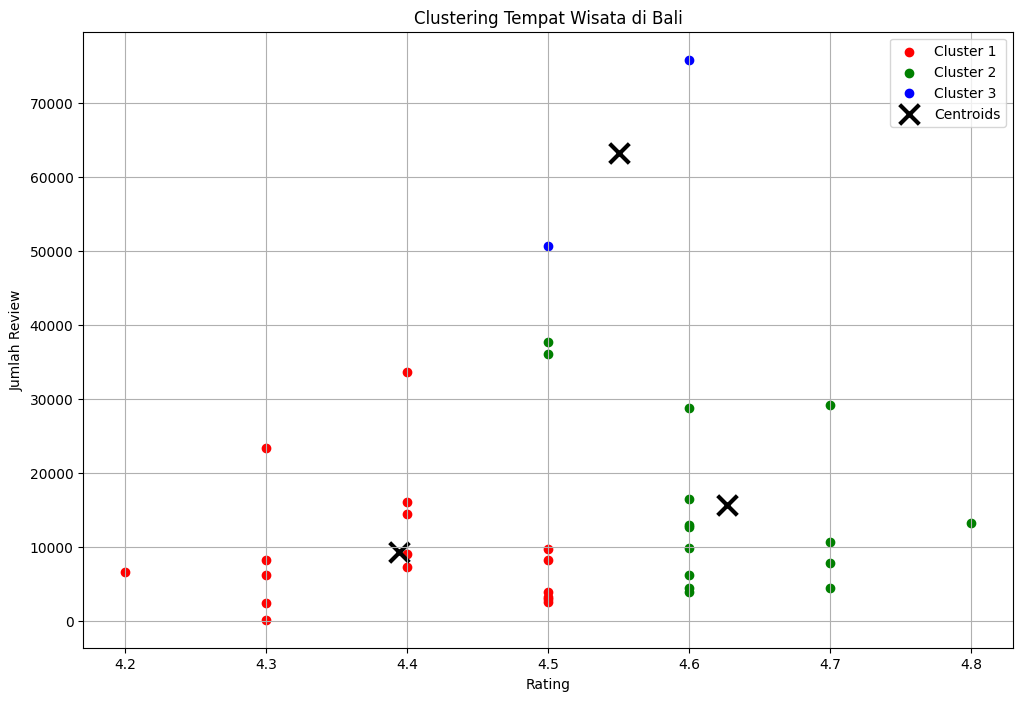


Silhouette Score: 0.4045
--------------------
Cluster 1: Destinasi yang memerlukan perhatian lebih untuk meningkatkan daya tariknya
Cluster 2: Destinasi dengan rating tinggi namun ulasan relatif lebih rendah (highly rated but less known places).
Cluster 3: Destinasi dengan jumlah ulasan dan rating yang tinggi (highly popular places).

Hasil Pengelompokan:

Cluster 1:
Total Tempat Wisata: 17
Rata-rata Rating: 4.39
Rata-rata Review: 9302
Tempat wisata: Mount Batur, Goa Gajah, Tenggalang Rice Terrace, Seminyak Beach, Besakih Temple (Pura Besakih), Pura Penataran Agung Lempuyang, Sidemen Valley, West Bali National Park, Bali Zoo, Tegenungan Waterfall, Bali Swing, Campuhan Ridge Walk, Bali Safari and Marine Park, Sukawati Art Market, Banjar Hot Spring, Bali Pulina, Pantai Batu Bolong

Cluster 2:
Total Tempat Wisata: 15
Rata-rata Rating: 4.63
Rata-rata Review: 15630
Tempat wisata: Uluwatu Temple, Ubud Monkey Forest, Jatiluwih Rice Terraces in Bali, Pura Ulun Danu Bratan, Nusa Dua Beach, Kut

In [ ]:
# Step 6: Evaluasi Hasil Klastering

# clusters with centroids
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']

for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Google Maps Rating'],
                cluster_data['Google Reviews (Count)'],
                c=colors[i],
                label=f'Cluster {i+1}')

# Menambahkan centroid ke visualisasi
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            centroids[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            c='black',
            marker='x',
            s=200,
            linewidths=3,
            label='Centroids')

plt.title('Clustering Tempat Wisata di Bali')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.legend()
plt.grid(True)
plt.show()

# Menghitung dan menampilkan Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {sil_score:.4f}")
print("-"*20)
print("Cluster 1: Destinasi yang memerlukan perhatian lebih untuk meningkatkan daya tariknya")
print("Cluster 2: Destinasi dengan rating tinggi namun ulasan relatif lebih rendah (highly rated but less known places).")
print("Cluster 3: Destinasi dengan jumlah ulasan dan rating yang tinggi (highly popular places).")

# Analisis hasil clustering
print("\nHasil Pengelompokan:")
for i in range(3):
    cluster_places = df[df['Cluster'] == i]['Place'].tolist()
    avg_rating = df[df['Cluster'] == i]['Google Maps Rating'].mean()
    avg_reviews = df[df['Cluster'] == i]['Google Reviews (Count)'].mean()
    total_places = len(cluster_places)  # Menghitung total tempat wisata di klaster
    print(f"\nCluster {i+1}:")
    print(f"Total Tempat Wisata: {total_places}")
    print(f"Rata-rata Rating: {avg_rating:.2f}")
    print(f"Rata-rata Review: {avg_reviews:.0f}")
    print("Tempat wisata:", ", ".join(cluster_places))


In [ ]:
#Hasil klustering dengan 3 segmen utama telah diperoleh:

#Cluster 1: Destinasi yang memerlukan perhatian lebih untuk meningkatkan daya tariknya
#Cluster 2: Destinasi dengan rating tinggi namun ulasan relatif lebih rendah (highly rated but less known places).
#Cluster 3: Destinasi dengan jumlah ulasan dan rating yang tinggi (highly popular places).
